# Spotify Music Analysis

Hey! Have you ever been curious about how music "looks" like?? 

This script identifies the song you're currently listening to on Spotify and creates a wordcloud based on the song's album cover. I hope you enjoy these visualizations!

## Step 1. Find the user's currently listening song.

Spotify is prettyyyyy picky about scraping.

In order to get around that, I used a libray called "Spotipy" [https://pypi.org/project/spotipy/] which allows a user to access Spotify for Developers. With access through that, a user can access a couple of different scopes, including a user's playlists, user's currently listening, user's following, etc.

In [1]:
#!pip install git+https://github.com/plamere/spotipy.git@master
#!pip install spotipy

In [2]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials

After downloading spotipy, a user has to set their credentials. In order to do this, a user has to set up an application on the Spotify Developer page. This will include a predefined client ID and secret ID, as well as a chosen redirect URI. We'll set these to be part of the Python environment.

In [3]:
import os

os.environ['SPOTIPY_CLIENT_ID'] = 'c0ef476c87da4461a8472de2dcd0a3fb'
os.environ['SPOTIPY_CLIENT_SECRET'] = '5e63b82bc1594777b39f4602c1b6bc31'
os.environ['SPOTIPY_REDIRECT_URI'] = 'http://127.0.0.1:9090'

After setting these as environment variables, call them into the current session.

In [4]:
SPOTIPY_CLIENT_ID = os.environ['SPOTIPY_CLIENT_ID']
SPOTIPY_CLIENT_SECRET = os.environ['SPOTIPY_CLIENT_SECRET']
SPOTIPY_REDIRECT_URI = os.environ['SPOTIPY_REDIRECT_URI']

Now, the fun part! Let's find what I'm currently listening too. We'll set the scope to what I'm currently listening to, provide the access information, and then find the artist and song title of my current playing.

In [5]:
scope = 'user-read-currently-playing'
token = util.prompt_for_user_token(
    'ellenwray', scope, client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET, redirect_uri=SPOTIPY_REDIRECT_URI)

In [6]:
if token:
    sp = spotipy.Spotify(auth=token)
    current_song = sp.currently_playing()
    artist = current_song['item']['artists'][0]['name']
    name_song = current_song['item']['name']
    print(artist, name_song)
else:
    print("Can't get token for", USERNAME)

Alec Benjamin Water Fountain


## Step 2. Return the lyrics of the song.

In order to return the song lyrics, we'll look up the lyrics from azlyrics.com. The below uploads the selenium library, which is best for webscraping.

In [7]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
import time

Look up the artist, song name, and azlyrics.com. 

In [8]:
# Define our google search here as the artist's name, song name, and azlyrics.com.
# i.e. Taylor Swift You Belong With Me azlyrics.com
google_search = str(artist + " " + name_song + " azlyrics.com")

# Here, we open Google Chrome
driver = webdriver.Chrome()
driver.get("https://www.google.com/")

# Here, we select the search bar element, clear it, and run our predfiend google search
search = driver.find_element("name", "q")
search.clear()
search.send_keys(google_search)
search.send_keys(Keys.RETURN)
time.sleep(3)

# Here, we select the first result, which is 99% of the time the azlyrics listing
try:
    first_result = driver.find_element(By.CSS_SELECTOR, "#rso > div:nth-child(1) > div > div > div.kb0PBd.cvP2Ce.jGGQ5e > div > div > span > a > h3")
    first_result.click()
except:
    first_result = driver.find_element(By.CSS_SELECTOR, "#rso > div:nth-child(1) > div > div > div > div.kb0PBd.cvP2Ce.jGGQ5e > div > div > span > a > h3")
    first_result.click()

Now, we'll use BeautifulSoup to parse the html and return only the lyrics.

In [9]:
from bs4 import BeautifulSoup
import requests

In [10]:
# Here, we return the valid URL of the azlyrics' website
get_url = driver.current_url

# Here, we return the HTML and turn it into soup!
res = requests.get(get_url)
soup = BeautifulSoup(res.text)

In [11]:
# Here, we return the lyrics from the soup object
lyrics = str(soup).split('<!-- Usage of azlyrics.com content by any third-party lyrics provider is prohibited by our licensing agreement. Sorry about that. -->')[1].split('<!-- MxM banner -->')[0]

# Here, we split the song up by its lines and clean up the breaks and empty lines to return clean lyrics
clean_lyrics =  lyrics.split("\n")
clean_lyrics = [item.replace("<br/>", "").replace("\\","").strip().lower() for item in clean_lyrics]
clean_lyrics = [item for item in clean_lyrics if item != ""]
clean_lyrics[0:5]

['she told me that she loved me by the water fountain',
 "she told me that she loved me and she didn't love him",
 "and that was really lovely 'cause it was innocent",
 "but now she's got a cup with something else in it",
 "it's getting kind of blurry at a quarter past ten"]

## Step 3. Return the album cover of the song.

We'll use Google Image Crawler to return the album cover. This is not perfect - sometimes it doesn't return the best image, but most of the time it returns the album cover.

In [12]:
#!pip install icrawler

In [13]:
import pandas as pd
import numpy as np
from PIL import Image
from icrawler.builtin import GoogleImageCrawler

In [14]:

# Here, we create our directory/folder to be the artist's name and first three letters of their song
root_dir = r"C:\\Users\\ewray\\OneDrive - FTI Consulting\\Documents\\Personal Development\\Fun\\" + artist.lower().replace(" ", "-") + name_song[0:3].lower()

# Here, we set the directory
google_Crawler = GoogleImageCrawler(storage = {'root_dir': root_dir})

# Here, we search Google Images for the artist, song, and spotify album cover
# i.e. Taylor Swift You Belong With Me spotify album cover
google_Crawler.crawl(keyword = artist + " " + name_song  + ' spotify album cover', max_num = 1)

2024-03-13 15:45:56,232 - INFO - icrawler.crawler - start crawling...
2024-03-13 15:45:56,239 - INFO - icrawler.crawler - starting 1 feeder threads...
2024-03-13 15:45:56,254 - INFO - feeder - thread feeder-001 exit
2024-03-13 15:45:56,275 - INFO - icrawler.crawler - starting 1 parser threads...
2024-03-13 15:45:56,311 - INFO - icrawler.crawler - starting 1 downloader threads...
2024-03-13 15:45:57,229 - INFO - parser - parsing result page https://www.google.com/search?q=Alec+Benjamin+Water+Fountain+spotify+album+cover&ijn=0&start=0&tbs=&tbm=isch
2024-03-13 15:45:57,582 - INFO - downloader - image #1	https://i.pinimg.com/originals/37/a7/64/37a764f241778550d1c2c35c2cee2313.jpg
2024-03-13 15:45:57,790 - INFO - downloader - downloaded images reach max num, thread downloader-001 is ready to exit
2024-03-13 15:45:57,796 - INFO - downloader - thread downloader-001 exit
2024-03-13 15:45:58,345 - INFO - icrawler.crawler - Crawling task done!


Here, we upload the image saved by Google Image Crawler as an image type.

In [15]:
filename = os.listdir(r"C:\\Users\\ewray\\OneDrive - FTI Consulting\\Documents\\Personal Development\\Fun\\" + artist.lower().replace(" ", "-") + name_song[0:3].lower())
original = Image.open(r"C:\\Users\\ewray\\OneDrive - FTI Consulting\\Documents\\Personal Development\\Fun\\" + artist.lower().replace(" ", "-") + name_song[0:3].lower() + "\\" + filename[0])

## Step 4. Return the colors in the album cover.

In [16]:
reduced = original.convert("P", palette=Image.Palette.WEB)
palette = reduced.getpalette() 
palette = [palette[3*n:3*n+3] for n in range(256)] 
color_count = [(n, palette[m]) for n,m in reduced.getcolors()]

RGB_df = pd.DataFrame(color_count, columns = ['cnt', 'RGB']).sort_values(by = 'cnt', ascending = False).iloc[1:4]
RGB = pd.DataFrame(RGB_df['RGB'].to_list(), columns = ['r', 'g', 'b'])
RGB['Total'] = RGB.r + RGB.g + RGB.b
RGB = RGB.sort_values(by=["Total"]).drop(['Total'], axis = 1).reset_index()

number_colors = len(RGB.r)

if number_colors == 2:
    idxs = np.split(RGB.index, 2) #split index
    #add index in place
    RGB.set_index(idxs[0].union(idxs[1] + 1), inplace=True)
    #add row with darker color
    RGB.loc[1] = [1, np.round(255-RGB.r[0]),np.round(255-RGB.g[0]),np.round(255-RGB.b[0])]
else:
    RGB


RGB = RGB[['r', 'g', 'b']]

def rgb_to_hex(red, green, blue):
    """Return color as #rrggbb for the given color values."""
    return '#%02x%02x%02x' % (red, green, blue)

RGB['hex'] = RGB.apply(lambda r: rgb_to_hex(*r), axis=1) #convert rgb to hex
color = RGB.hex.to_list()
color

['#cc9966', '#cc9999', '#ffcc66']

In [17]:
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

def setListOfcolor_func(word=None, font_size=None,  
                     position=None, orientation=None,  
                     font_path=None, random_state=None):  
    #define the list of set colors  
    color_list = colors
    #return a random color in the list  
    return np.random.choice(color_list)  


In [18]:
colors = get_color_gradient(color[0], color[1], 100)

2024-03-13 15:45:58,626 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2024-03-13 15:45:58,639 - INFO - parser - thread parser-001 exit


## Step 5. Create the wordcloud.

In [19]:
#!pip install wordcloud

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import colormaps
import matplotlib.colors as clr
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ewray\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
clean_lyrics = " ".join(clean_lyrics)

word_tokens = clean_lyrics.split(" ")

words = [item.replace("'","") for item in word_tokens]

words = [item for item in words if item != ""]

text = " ".join(words)

In [22]:
#Create the mask
spotify_mask = np.array(Image.open("C:\\Users\\ewray\\OneDrive - FTI Consulting\\Documents\\Personal Development\\Fun\\spotify_logo_v2.png"))

In [23]:
wordcloud = WordCloud(font_path = 'arial', width = 800, height = 800,
                mask=spotify_mask,
                contour_width = 0.2,
                contour_color = colors[0],
                background_color = "white",
                color_func = setListOfcolor_func,
                stopwords = stop_words,
                min_font_size = 0.005).generate(text)

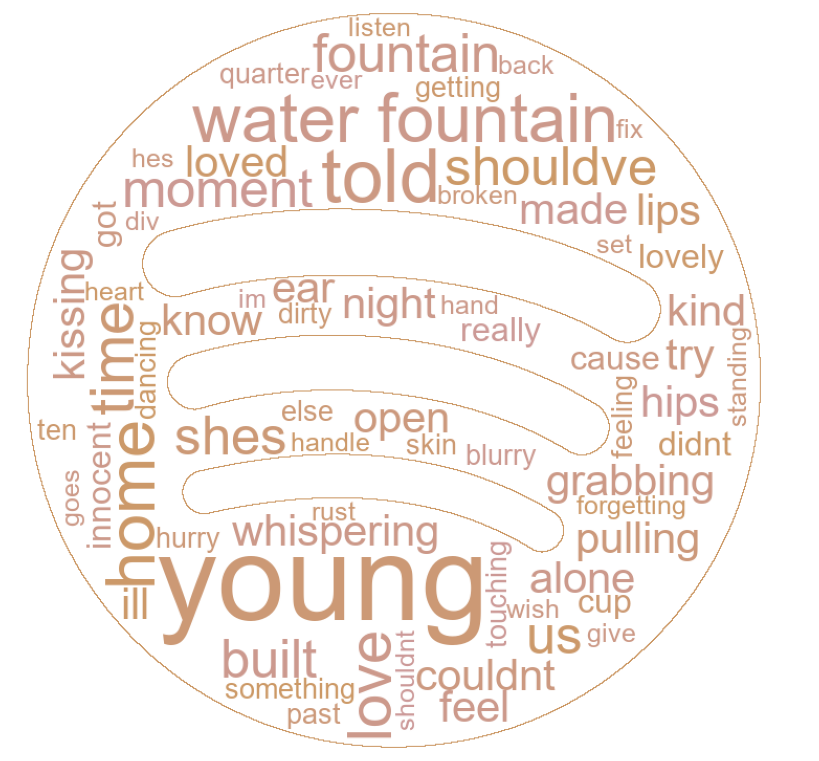

In [24]:
# plot the WordCloud image    
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()